# Embeddings

In [1]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential

## Loading the data

In [2]:
with h5py.File('/data/joint_scoring/labels_train.h5', 'r') as hf:
    labels_train = hf['labels_train'][:]
    
with h5py.File('/data/joint_scoring/img_train.h5', 'r') as hf:
    img_train = hf['img_train'][:]

with h5py.File('/data/joint_scoring/labels_test.h5', 'r') as hf:
    labels_test = hf['labels_test'][:]
    
with h5py.File('/data/joint_scoring/img_test.h5', 'r') as hf:
    img_test = hf['img_test'][:]

print([labels_train.shape, img_train.shape])
print([labels_test.shape, img_test.shape])

[(72298,), (72298, 150, 150, 1)]
[(19611,), (19611, 150, 150, 1)]


In [3]:
from tensorflow.python.keras.models import load_model

loaded_model = load_model("/data/joint_scoring/models/20171108_195245.h5")

In [4]:
pred = loaded_model.predict_classes(img_test)

KeyboardInterrupt: 

In [56]:
diff = pred - labels_test

In [57]:
diff

array([ 0.,  0.,  3., ...,  1.,  2.,  0.])

## Build truncated model

In [5]:
config = loaded_model.get_config()

In [6]:
config = config[0:48]

In [7]:
model = Sequential.from_config(config)

In [8]:
weights = loaded_model.get_weights()

In [9]:
model.set_weights(weights)

## Get embeddings

In [10]:
img_combined = np.concatenate((img_train, img_test))
labels_combined = np.concatenate((labels_train, labels_test))

In [11]:
embeddings = model.predict(img_combined)

In [12]:
from sklearn.decomposition import PCA

x_50d = PCA(n_components=50).fit_transform(embeddings)

In [13]:
from sklearn.manifold import TSNE

x_2d = TSNE(n_components=2, random_state=1).fit_transform(x_50d)

KeyboardInterrupt: 

## 2D

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,25))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 6))
plt.colorbar()
plt.savefig('/data/joint_scoring/images/tsne_classification.png', bbox_inches='tight')

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,25))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=diff, cmap=plt.cm.get_cmap("RdBu", 10))
plt.colorbar()
plt.savefig('/data/joint_scoring/images/tsne_diference_classification.png', bbox_inches='tight')

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [15]:
weights = {0: 0.2468182438891165, 1: 0.61240428271328862, 2: 7.3563288563288562, 3: 15.980990274093722, 4: 27.700383141762451, 5: 12.358632478632479}

In [16]:
def weight(x):
    return np.vectorize(weights.get)(x.astype("int"))

In [17]:
embeddings_train = embeddings[:72298]
embeddings_test = embeddings[72298:]

In [85]:
cv_scores = []

kk = range(1,200,10)

for k in kk:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
    scores = cross_val_score(knn, embeddings_train, labels_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())

1


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


11


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


21


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


31


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


41


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


51


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


61


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


71


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


81


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


91


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


101


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


111


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


121


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


131


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


141


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


151


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


161


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


171


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


181


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


191


/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


In [86]:
cv_scores

[0.64444383555479845,
 0.71064206686174614,
 0.71851225123210238,
 0.72047635806751742,
 0.72238512685898193,
 0.72264794602671567,
 0.72185953367368905,
 0.72000608685577405,
 0.71903786278356807,
 0.71754405623966999,
 0.71688013439753062,
 0.71588425852163629,
 0.71484688963506571,
 0.71461176742119492,
 0.71412766877709299,
 0.7143074766699864,
 0.71422447151720347,
 0.71429363010619773,
 0.71440429471524092,
 0.71409999707671745]

The optimal number of neighbors is 51


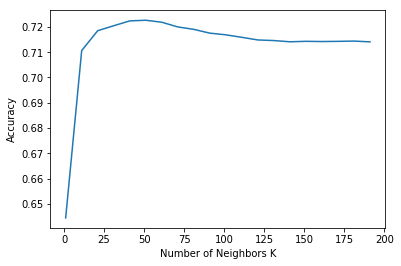

In [87]:
# determining best k
from matplotlib import pyplot as plt
optimal_k = kk[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.close()
plt.plot(kk, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_predict
knn = KNeighborsClassifier(n_neighbors=51, weights=weight)
knn = knn.fit(X=embeddings_train, y=labels_train)
pred = knn.predict(X=embeddings_test)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/extmath.py:439: RuntimeWarning: invalid value encountered in greater
  mostfrequent = np.where(counts > oldcounts, score, oldmostfreq)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, pred)

0.70858191831115191

In [20]:
!pip3 install statsmodels

In [21]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(sum(labels_test == pred), len(labels_test), alpha=0.05, method='wilson')

(0.70218164251235082, 0.714900494866896)

Confusion matrix, without normalization
[[12160  1085     7    10     4    20]
 [ 3630  1594    67    49     9    20]
 [   92   221    29    56     8    17]
 [   20    85    12    38    10    12]
 [   14    39     5    17    13    10]
 [   60    90     2    31    13    62]]
Normalized confusion matrix
[[  9.15249134e-01   8.16649104e-02   5.26870390e-04   7.52671986e-04
    3.01068794e-04   1.50534397e-03]
 [  6.76103557e-01   2.96889551e-01   1.24790464e-02   9.12646675e-03
    1.67628981e-03   3.72508847e-03]
 [  2.17494090e-01   5.22458629e-01   6.85579196e-02   1.32387707e-01
    1.89125296e-02   4.01891253e-02]
 [  1.12994350e-01   4.80225989e-01   6.77966102e-02   2.14689266e-01
    5.64971751e-02   6.77966102e-02]
 [  1.42857143e-01   3.97959184e-01   5.10204082e-02   1.73469388e-01
    1.32653061e-01   1.02040816e-01]
 [  2.32558140e-01   3.48837209e-01   7.75193798e-03   1.20155039e-01
    5.03875969e-02   2.40310078e-01]]


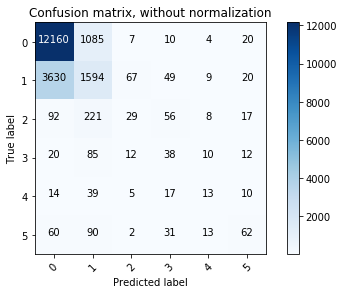

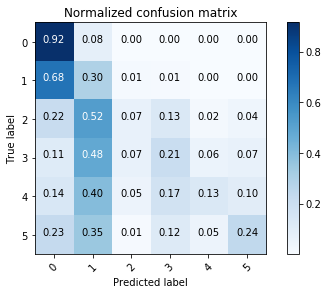

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(labels_test, pred)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(6),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(6), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [25]:
cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Mean accuracy per class")
print(np.mean(np.diag(cm)))

Mean accuracy per class
0.311391501576


In [26]:
proportion_confint(int(0.243961583136 * len(labels_test)), len(labels_test), alpha=0.05, method='wilson')

(0.23798461140387528, 0.25000513242942429)

In [27]:
upper = np.diag(cm, 1)
upper = np.append(upper, 0)
diagonal = np.diag(cm)
lower = np.diag(cm, -1)
lower = np.append(0, lower)

arr = np.vstack((upper, diagonal, lower))
print("Mean accuracy in the correct class or +- 1")
print(arr.sum(axis=0).mean())

Mean accuracy in the correct class or +- 1
0.623939074286


In [28]:
proportion_confint(int(0.526196617395 * len(labels_test)), len(labels_test), alpha=0.05, method='wilson')

(0.51919153314825583, 0.53316677941603785)

## 3D

In [17]:
from sklearn.manifold import TSNE
x_embedded = TSNE(n_components=3, random_state=1).fit_transform(x_50d)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(x_embedded[:, 0], x_embedded[:, 1], x_embedded[:, 2], c=y, cmap=plt.cm.get_cmap("viridis", 6))
plt.savefig('/data/joint_scoring/images/tsne_3d_classification.png', bbox_inches='tight')

In [129]:
!pip3 install scikit-image --upgrade
from skimage.transform import resize
imgs_resized = [resize(image=x, output_shape=(50, 50)) for x in imgs]
imgs_resized = np.array(imgs_resized)

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.5/dist-packages
Requirement already up-to-date: matplotlib>=1.3.1 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: scipy>=0.17.0 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: six>=1.7.3 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: PyWavelets>=0.4.0 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: pillow>=2.1.0 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: networkx>=1.8 in /usr/local/lib/python3.5/dist-packages (from scikit-image)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /usr/local/lib/python3.5/dist-packages (from matplotlib>=1.3.1->scikit-image)
Requirement already up-to-date: numpy>=1.7.1 in /usr/local/lib/python3.5/dist-packages (from matplotlib>=1

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [95]:
cm = plt.cm.get_cmap("viridis", 6)
color = np.ones((6, 4))
for i in range(6):
    color[i] = cm(1.*i/6)

#color = [x[0:-1] for x in color]
color = [np.append((x[0:-1] * 255),1) for x in color]
color = np.array(color)


color = color.astype("int16")

print(color)
print(type(color[0]))

[[ 68   1  84   1]
 [ 64  67 135   1]
 [ 41 120 142   1]
 [ 34 167 132   1]
 [121 209  81   1]
 [253 231  36   1]]
<class 'numpy.ndarray'>


In [96]:
tuple(color[0])

(68, 1, 84, 1)

In [117]:
y

62.845509

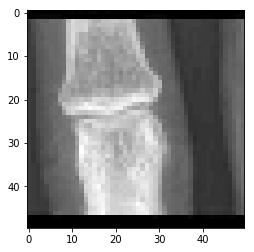

In [201]:
plt.imshow(imgs_resized[1].squeeze(), cmap="gray")
plt.show()

In [221]:
from PIL import Image
from PIL import ImageMath

imgs_border = []

old_size = (50, 50)
new_size = (54, 54)

for i, img in enumerate(imgs_resized):
    if i % 100 == 0:
        clear_output()
        print("Creating images with colored borders, {0:.2f} % finished".format(i/19611*100))
    old_im = Image.fromarray((img.squeeze()*255).astype("int16"))
    old_im = old_im.convert("RGB")
    new_im = Image.new("RGB", new_size, tuple(color[int(y[i])]))
    new_im.paste(old_im, (2,2))
    dat = np.asarray(a=new_im)
    imgs_border.append(dat)


Creating images with colored borders, 99.94 % finished


In [225]:
np.array(imgs_border).shape

(19611, 54, 54, 3)

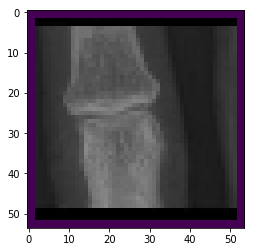

In [226]:
plt.imshow(imgs_border[1])
plt.show()

In [227]:
from IPython.display import clear_output
res = 8000 # resolution of plot
cval = 255 # background colour

images = imgs_border
max_width = max([image.shape[0] for image in images])
max_height = max([image.shape[1] for image in images])

In [228]:
f2d = x_2d

xx = f2d[:, 0]
yy = f2d[:, 1]
x_min, x_max = xx.min(), xx.max()
y_min, y_max = yy.min(), yy.max()
# Fix the ratios
sx = (x_max-x_min)
sy = (y_max-y_min)
if sx > sy:
    res_x = sx/float(sy)*res
    res_y = res
else:
    res_x = res
    res_y = sy/float(sx)*res

In [229]:
res_x, res_y

(8000, 8615.1535825786468)

In [230]:
res_y=res_y.astype("int16")

In [231]:
images[0].shape

(54, 54, 3)

In [232]:
canvas = np.ones((res_x+max_width, res_y+max_height, 3))*cval
x_coords = np.linspace(x_min, x_max, res_x)
y_coords = np.linspace(y_min, y_max, res_y)
i = 0
for x, y, image in zip(xx, yy, images):
    clear_output()
    print("Creating plot, {0:.2f} % finished".format(i/19611*100))
    i = i + 1
    w, h = image.shape[:2]
    x_idx = np.argmin((x - x_coords)**2)
    y_idx = np.argmin((y - y_coords)**2)
    canvas[x_idx:x_idx+w, y_idx:y_idx+h] = image

Creating plot, 99.99 % finished


In [ ]:
!rm /data/joint_scoring/images/embeddings_classification.png

In [234]:
plt.figure(figsize=(400,400))
plt.imshow(canvas)
plt.savefig('/data/joint_scoring/images/embeddings_classification.png', bbox_inches='tight')